In [6]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
%conda install pandas

ERROR: Line magic function `%conda` not found.


In [8]:
import pandas

In [10]:
train_x = np.linspace(1.0, 10.0, num = 100)[:, np.newaxis]
train_y = np.sin(train_x) + 0.1* np.power(train_x, 2) + 0.5 + np.random.randn(100, 1)

with np.load("TINY_MNIST.npz") as data:
    x, t = data["x"], data["t"]
    x_eval, t_eval = data["x_eval"], data["t_eval"]
    

In [53]:
# Task 3
# get Euclidean distance

def getEucDist(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

def getEucDistAll(vecToClass, vecs, resp):
    arr = [] 
    for idx, val in enumerate(vecs):
        arr.append([getEucDist(val, vecToClass), resp[idx][0]])
    arr.sort(key=lambda x: x[0])
    ed = np.asarray(arr)
    return ed

def getVote(sortedResp, K):
    p1 = np.count_nonzero(sortedResp[0:K])/K
    return p1


In [57]:
ed = getEucDistAll(x_eval[1], x, t)
getVote(ed[:,1], 300)

0.31666666666666665

<function matplotlib.pyplot.show>

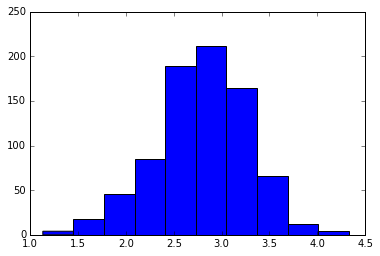

In [29]:
plt.hist(ed[:,0])
plt.show

In [40]:
np.count_nonzero(ed[0:1,1])

0

### Task 3

In [50]:
Nnei = [5, 50, 100, 200, 400, 800]
kval = [1, 3, 5, 7, 21, 101, 401]

In [52]:
x[0:40]

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.08, ...,  0.13,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [ 0.11,  0.2 ,  0.24, ...,  0.55,  0.46,  0.  ],
       [ 0.19,  0.42,  0.42, ...,  0.52,  0.22,  0.  ],
       [ 0.  ,  0.  ,  0.02, ...,  0.62,  0.17,  0.  ]])

In [82]:
def getResid(n, k, x_val, tr, resp):
    arr_comp = []
    for idx, im in enumerate(x_val):
        ed_iter = getEucDistAll(im, tr[0:n], resp[0:n])
        arr_comp.append([resp[idx][0] , getVote(ed_iter[:,1], k ) > 0.5 ])
    return arr_comp
# n = 40
# arr_comp = []
# for idx, im in enumerate(x_eval):
    # ed_iter = getEucDistAll(im, x[0:n], t[0:n])
    # arr_comp.append([t[idx][0] , getVote(ed_iter[:,1], 10 ) > 0.5 ])
    
res = np.asarray(getResid(5, 5, x_eval, x, t))

In [103]:
df = pandas.DataFrame(res)
df.columns = ['resp', 'forec']

In [104]:
df

,resp,forec
0,0,1
1,1,1
2,1,1
3,0,1
4,1,1
5,1,1
6,1,1
7,0,1
8,1,1
9,1,1


In [102]:
df.ix[(df['resp']== 1) & (df['forec'] == 0) ]

,resp,forec
